In [1]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import proportion

In [3]:
data = pd.read_excel('результаты А_B.xlsx')

In [4]:
data.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [6]:
data.shape

(90189, 5)

In [7]:
data.version.value_counts() # проверим размеры выборок

gate_40    45489
gate_30    44700
Name: version, dtype: int64

Видим, что количество выборок примерно одно. Проведем срез по каждой выборке отдельно

In [8]:
data[data['version']=='gate_40'].describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


In [9]:
data[data['version']=='gate_30'].describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


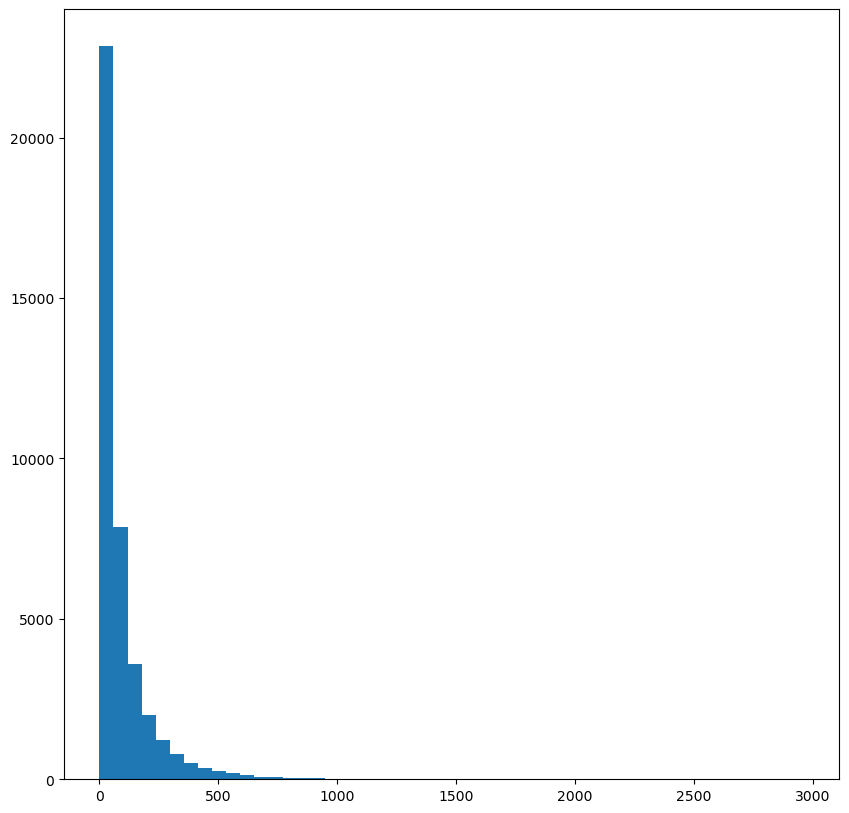

In [10]:
plt.figure(figsize=(10, 10))
control_visit_all = data['sum_gamerounds'][data['retention_1']>0]
test_visit_all = data['sum_gamerounds'][data['retention_1']>0]

plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all, bins=50)

plt.show()  #посмотрим график распределения

По графику видно что распределение не нормальное

Перепроверим себя тестом Колмогорова-Смирнова

In [11]:
from scipy.stats import kstest
print(kstest(control_visit_all, 'norm'))
print(kstest(test_visit_all, 'norm'))

KstestResult(statistic=0.9854007806225178, pvalue=0.0)
KstestResult(statistic=0.9854007806225178, pvalue=0.0)


Pvalue <0.05, распределение не нормальное

In [12]:
from scipy.stats import shapiro

In [13]:
#Запустим тест Шапиро проверим нормальность распределения. 
alpha = 0.05

st = shapiro(data.sum_gamerounds)
print('Распределение {}нормальное\n'.format( {True:'не ',
False:''}[st[1] < alpha]));

Распределение не нормальное



In [14]:

from scipy.stats import ttest_ind

In [15]:
ttest_ind(data[data.version == 'gate_30'].sum_gamerounds,
          data[data.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

Pvalue>0.05 отвергаем нулевую гипотезу. между выборкамии нет большой разницы. 

Text(0.5, 1.0, 'Количество игровых раундов игроков за первую неделю')

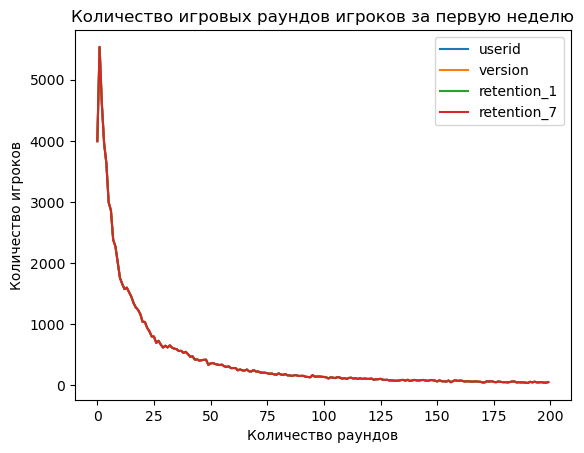

In [16]:

# Найдем сколько рандов пользователь играет
plot_df = data.groupby('sum_gamerounds').count()

ax = plot_df[:200].plot()
ax.set_xlabel('Количество раундов')
ax.set_ylabel('Количество игроков')
ax.set_title('Количество игровых раундов игроков за первую неделю')

Видим что большая часть игроков играют за первую неделю менее 20 раундов. 

посмотрим какая возвращаемость в течение дня.

In [17]:
oneday = data.retention_1.sum()/data.retention_1.count()
print(str(oneday*100)+'%')

44.52095044850259%


In [18]:
#возвращаемость после 7 дней
oneday = data.retention_7.sum()/data.retention_7.count()
print(str(oneday*100)+'%')

18.60648194347426%


Проверим для групп

In [19]:
oneday = data.retention_1.groupby(data.version).sum()/data.retention_1.groupby(data.version).count()
print(oneday*100)

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


In [20]:
oneweek = data.retention_7.groupby(data.version).sum()/data.retention_7.groupby(data.version).count()
print(oneday*100)

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


Мы видим, что в обоих случаях retention_1 и retention_7 выборка "gate_30" имеет показатель возвращаемости выше, чем "gate_40" предварительно можем сделать вывод, что необходимо оставить выборку "gate_30" и не выкатывать тест с "gate_40" постоянную основу. Перепроверим себя еще раз рассчитав bootstrapped 

In [21]:
!pip install bootstrapped

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [23]:
plt.style.use('ggplot')

In [24]:
n = 11_000
sample_A = np.random.exponential(scale=1/0.002, size=n)
sample_B = np.random.exponential(scale=1/0.00201, size=n)

df = pd.DataFrame({"sample_A": sample_A, "sample_B": sample_B})

In [25]:
s_1 = df.sample_A.values

s_2 = df.sample_B.values

b = bs.bootstrap_ab(s_1, s_2, stat_func=bs_stats.mean,
                    compare_func=bs_compare.difference, alpha=0.05, num_iterations=10_000)

print(b.lower_bound, b.upper_bound)

-16.52079675292334 9.868864161886524


Видим, что 0 включен в интервал, можем сделать вывод, что между выборками нет статистической значимости, что подтверждает выводы сделанные мной ранее. 
Можем сделать общий вывод, что для retention_1 и retention_7 оставляем параметры выборки "gate_30",  а параметры выборки "gate_40" не используем.